In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Cek dimensi data
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Cek nilai pixel sebelum normalisasi
print(f"\nPixel value range: {x_train.min()} - {x_train.max()}")
print(f"Sample label: {y_train[0]}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

Pixel value range: 0 - 255
Sample label: [6]


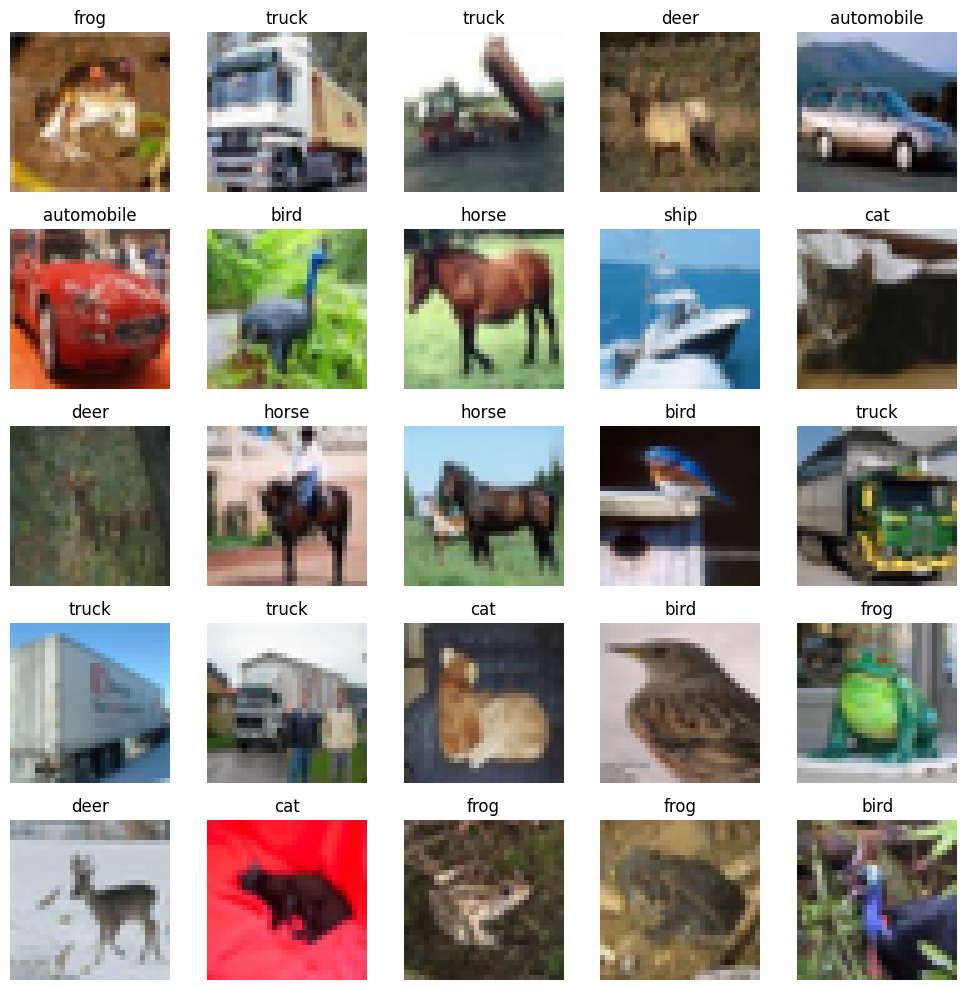

In [ ]:
# Definisikan nama kelas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualisasi 25 gambar pertama
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Normalisasi pixel values dari 0-255 ke 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Cek hasil normalisasi
print(f"Normalized pixel range: {x_train.min():.2f} - {x_train.max():.2f}")

Normalized pixel range: 0.00 - 1.00


In [ ]:
# Convert labels ke one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Cek hasil konversi
print(f"Original label: {y_train[0]}")
print(f"Label shape: {y_train.shape}")

Original label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Label shape: (50000, 10)


In [ ]:
# Bangun model Sequential
model = keras.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Tampilkan summary model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,978 (2.11 MB)

 Trainable params: 551,274 (2.10 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
# Compile model dengan optimizer, loss, dan metrics
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

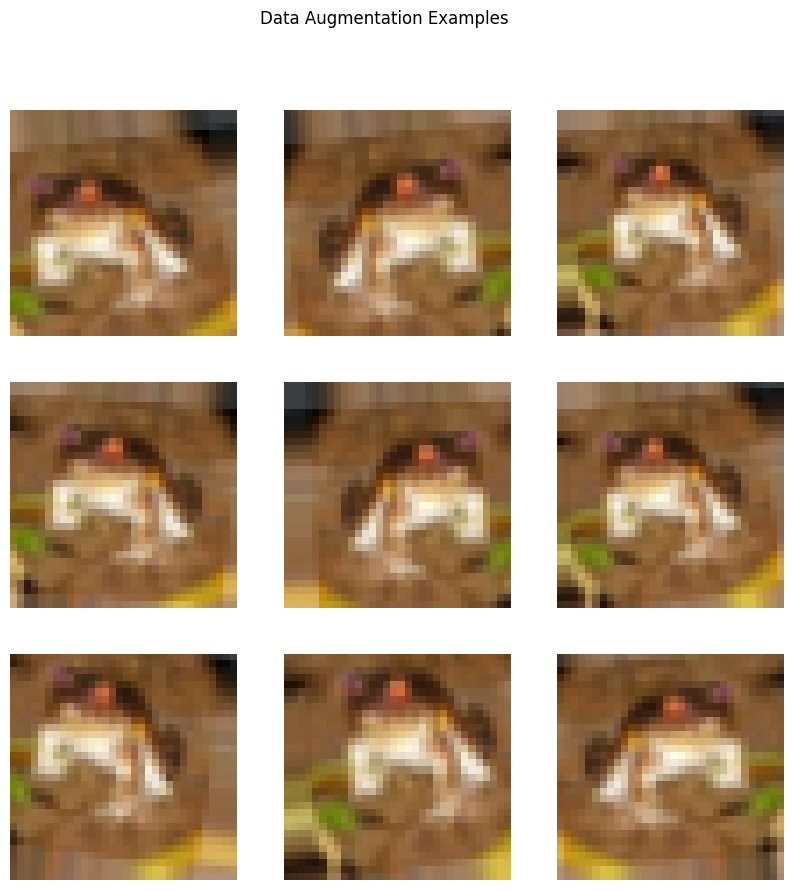

In [ ]:
# Buat ImageDataGenerator untuk augmentasi data
datagen = ImageDataGenerator(
    rotation_range=15,        # Rotasi random ±15 derajat
    width_shift_range=0.1,    # Geser horizontal 10%
    height_shift_range=0.1,   # Geser vertikal 10%
    horizontal_flip=True,     # Flip horizontal random
    zoom_range=0.1            # Zoom in/out 10%
)

# Fit generator pada training data
datagen.fit(x_train)

# Visualisasi augmented images
plt.figure(figsize=(10, 10))
sample_image = x_train[0:1]  # Ambil 1 gambar
augmented_images = [datagen.random_transform(sample_image[0]) for _ in range(9)]

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Data Augmentation Examples')
plt.show()

In [ ]:
# Definisikan callbacks untuk training
callbacks = [
    # Simpan model terbaik berdasarkan validation accuracy
    keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        save_best_only=True,
        monitor='val_accuracy',
        verbose=1
    ),

    # Kurangi learning rate jika val_loss tidak membaik
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,           # Kurangi LR jadi 50%
        patience=3,           # Tunggu 3 epochs
        min_lr=1e-7,
        verbose=1
    ),

    # Stop training jika tidak ada improvement
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,          # Tunggu 10 epochs
        restore_best_weights=True,
        verbose=1
    )
]

In [ ]:
import tensorflow as tf

# Cek GPU
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Device:", tf.config.list_physical_devices('GPU'))

# Kalau output: Num GPUs Available: 0
# Berarti GPU BELUM AKTIF!

Num GPUs Available: 1
GPU Device: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import time

print("🚀 Training dengan Data Augmentation...")
print()

start_time = time.time()

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    steps_per_epoch=len(x_train) // 128,  # Otomatis hitung steps yang benar
    epochs=25,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
    verbose=1
)

end_time = time.time()
total_minutes = (end_time - start_time) / 60
avg_time_per_epoch = (end_time - start_time) / len(history.history['loss'])

print("\n" + "="*70)
print("✅ TRAINING SELESAI!")
print("="*70)
print(f"⏱️  Total waktu: {total_minutes:.2f} menit")
print(f"⏱️  Rata-rata per epoch: {avg_time_per_epoch:.1f} detik")
print(f"📊 Total epochs: {len(history.history['loss'])}")
print(f"📈 Best validation accuracy: {max(history.history['val_accuracy'])*100:.2f}%")
print(f"📉 Best validation loss: {min(history.history['val_loss']):.4f}")
print("="*70)

print("\n🧪 Evaluasi model pada test set...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("\n" + "="*70)
print("📊 HASIL EVALUASI FINAL")
print("="*70)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print("="*70)

🚀 Training dengan Data Augmentation...

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.2721 - loss: 2.2743
Epoch 1: val_accuracy improved from -inf to 0.22790, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2724 - loss: 2.2733 - val_accuracy: 0.2279 - val_loss: 2.5156 - learning_rate: 0.0010
Epoch 2/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4375 - loss: 1.5490

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.22790 to 0.23090, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4375 - loss: 1.5490 - val_accuracy: 0.2309 - val_loss: 2.5128 - learning_rate: 0.0010
Epoch 3/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4937 - loss: 1.4005
Epoch 3: val_accuracy improved from 0.23090 to 0.53070, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.4938 - loss: 1.4003 - val_accuracy: 0.5307 - val_loss: 1.3617 - learning_rate: 0.0010
Epoch 4/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4531 - loss: 1.4006
Epoch 4: val_accuracy improved from 0.53070 to 0.53760, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4531 - loss: 1.4006 - val_accuracy: 0.5376 - val_loss: 1.3471 - learning_rate: 0.0010
Epoch 5/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5735 - loss: 1.1917
Epoch 5: val_accuracy improved from 0.53760 to 0.60380, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.5736 - loss: 1.1916 - val_accuracy: 0.6038 - val_loss: 1.1209 - learning_rate: 0.0010
Epoch 6/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6172 - loss: 1.1483
Epoch 6: val_accuracy did not improve from 0.60380
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6172 - loss: 1.1483 - val_accuracy: 0.5977 - val_loss: 1.1328 - learning_rate: 0.0010
Epoch 7/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6291 - loss: 1.0510
Epoch 7: val_accuracy improved from 0.60380 to 0.64460, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.6291 - loss: 1.0510 - val_accuracy: 0.6446 - val_loss: 1.0500 - learning_rate: 0.0010
Epoch 8/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6484 - loss: 1.0193
Epoch 8: val_accuracy improved from 0.64460 to 0.64850, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6484 - loss: 1.0193 - val_accuracy: 0.6485 - val_loss: 1.0326 - learning_rate: 0.0010
Epoch 9/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6604 - loss: 0.9715
Epoch 9: val_accuracy did not improve from 0.64850
390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.6604 - loss: 0.9715 - val_accuracy: 0.6247 - val_loss: 1.2457 - learning_rate: 0.0010
Epoch 10/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6719 - loss: 0.9135
Epoch 10: val_accuracy did not improve from 0.64850
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6719 - loss: 0.9135 - val_accuracy: 0.6363 - val_loss: 1.1793 - learning_rate: 0.0010
Epoch 11/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6833 - loss: 0.9024
Epoch 11: val_accuracy improved from 0.64850 to 0.72040, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.6833 - loss: 0.9024 - val_accuracy: 0.7204 - val_loss: 0.8344 - learning_rate: 0.0010
Epoch 12/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7188 - loss: 0.7757
Epoch 12: val_accuracy improved from 0.72040 to 0.72360, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7188 - loss: 0.7757 - val_accuracy: 0.7236 - val_loss: 0.8210 - learning_rate: 0.0010
Epoch 13/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7075 - loss: 0.8454
Epoch 13: val_accuracy did not improve from 0.72360
390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.7075 - loss: 0.8454 - val_accuracy: 0.7175 - val_loss: 0.8623 - learning_rate: 0.0010
Epoch 14/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7109 - loss: 0.7704
Epoch 14: val_accuracy did not improve from 0.72360
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7109 - loss: 0.7704 - val_accuracy: 0.7179 - val_loss: 0.8644 - learning_rate: 0.0010
Epoch 15/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7205 - loss: 0.8141
Epoch 15: val_accuracy improved from 0.72360 to 0.72990, saving model to best_model.h5



Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.7205 - loss: 0.8141 - val_accuracy: 0.7299 - val_loss: 0.8213 - learning_rate: 0.0010
Epoch 16/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8203 - loss: 0.5876
Epoch 16: val_accuracy did not improve from 0.72990
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8203 - loss: 0.5876 - val_accuracy: 0.7274 - val_loss: 0.8327 - learning_rate: 5.0000e-04
Epoch 17/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7427 - loss: 0.7439
Epoch 17: val_accuracy improved from 0.72990 to 0.76320, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.7427 - loss: 0.7439 - val_accuracy: 0.7632 - val_loss: 0.7181 - learning_rate: 5.0000e-04
Epoch 18/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6797 - loss: 0.8264
Epoch 18: val_accuracy improved from 0.76320 to 0.76630, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6797 - loss: 0.8264 - val_accuracy: 0.7663 - val_loss: 0.7042 - learning_rate: 5.0000e-04
Epoch 19/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7552 - loss: 0.7092
Epoch 19: val_accuracy improved from 0.76630 to 0.77750, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7552 - loss: 0.7092 - val_accuracy: 0.7775 - val_loss: 0.6516 - learning_rate: 5.0000e-04
Epoch 20/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7422 - loss: 0.6227
Epoch 20: val_accuracy did not improve from 0.77750
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7422 - loss: 0.6227 - val_accuracy: 0.7767 - val_loss: 0.6600 - learning_rate: 5.0000e-04
Epoch 21/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7605 - loss: 0.6946
Epoch 21: val_accuracy did not improve from 0.77750
390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.7605 - loss: 0.6946 - val_accuracy: 0.7631 - val_loss: 0.7001 - learning_rate: 5.0000e-04
Epoch 22/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7812 - loss: 0.6071
Epoch 22: val_accuracy did not improve from 0.77750

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - l

390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.7744 - loss: 0.6594 - val_accuracy: 0.7790 - val_loss: 0.6787 - learning_rate: 2.5000e-04
Epoch 24/25
  1/390 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8125 - loss: 0.5236
Epoch 24: val_accuracy improved from 0.77900 to 0.77960, saving model to best_model.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.5236 - val_accuracy: 0.7796 - val_loss: 0.6765 - learning_rate: 2.5000e-04
Epoch 25/25
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7783 - loss: 0.6343
Epoch 25: val_accuracy did not improve from 0.77960

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7783 - loss: 0.6343 - val_accuracy: 0.7775 - val_loss: 0.6961 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 19.

✅ TRAINING SELESAI!
⏱️  Total waktu: 7.16 menit
⏱️  Rata-rata per epoch: 17.2 detik
📊 Total epochs: 25
📈 Best validation accuracy: 77.96%
📉 Best validation loss: 0.6516

🧪 Evaluasi model pada test set...

📊 HASIL EVALUASI FINAL
Test Accuracy: 77.75%
Test Loss: 0.6516


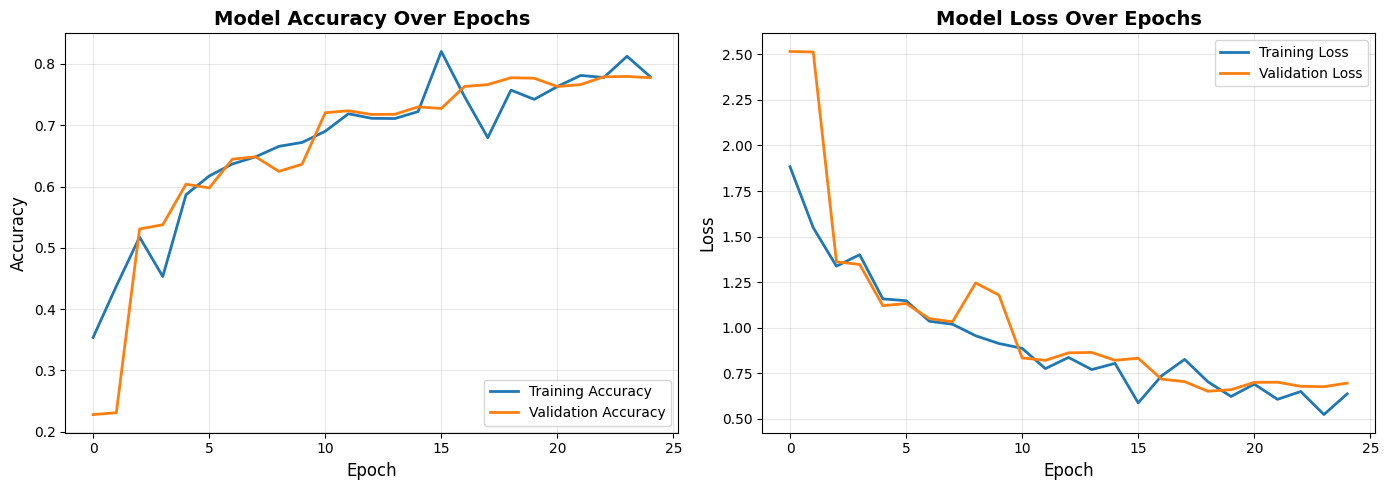

✅ Grafik disimpan sebagai 'training_history.png'


In [ ]:
import matplotlib.pyplot as plt

# Plot grafik accuracy dan loss
plt.figure(figsize=(14, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Grafik disimpan sebagai 'training_history.png'")

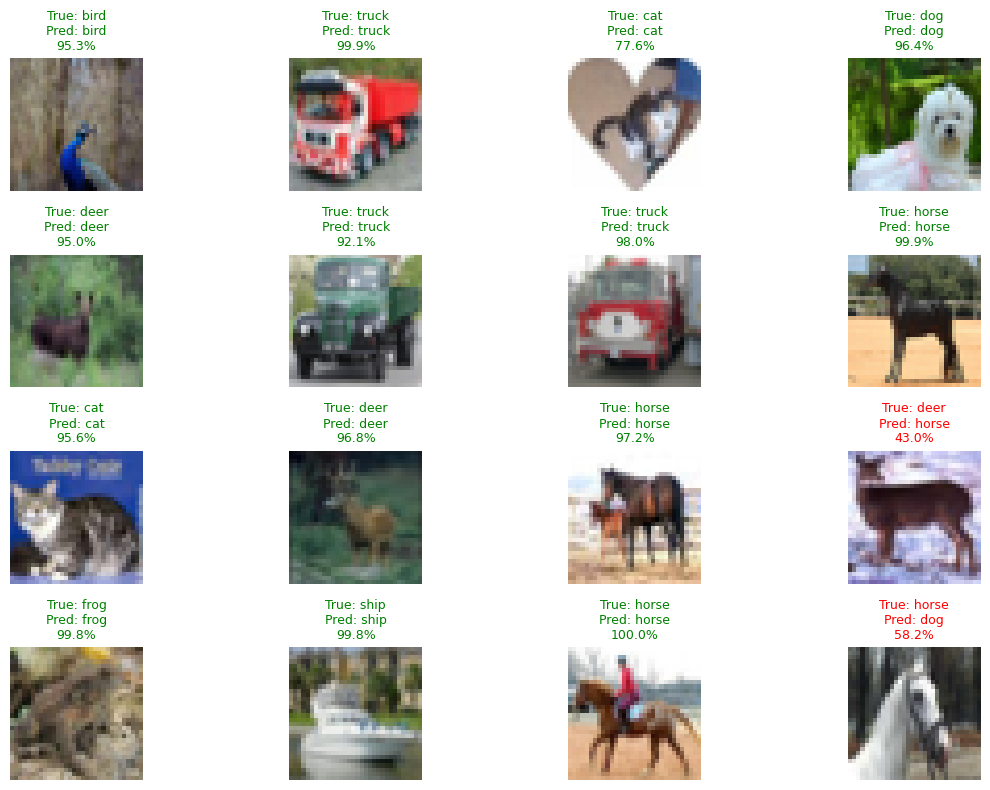

✅ Visualisasi prediksi disimpan sebagai 'predictions.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil 16 sample random dari test set
num_samples = 16
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Prediksi
predictions = model.predict(sample_images, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(sample_labels, axis=1)

# Visualisasi
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])

    # Warna hijau jika benar, merah jika salah
    color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
    confidence = predictions[i][predicted_classes[i]] * 100

    plt.title(
        f'True: {class_names[true_classes[i]]}\n'
        f'Pred: {class_names[predicted_classes[i]]}\n'
        f'{confidence:.1f}%',
        color=color, fontsize=9
    )
    plt.axis('off')

plt.tight_layout()
plt.savefig('predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualisasi prediksi disimpan sebagai 'predictions.png'")

🔄 Memprediksi seluruh test set...


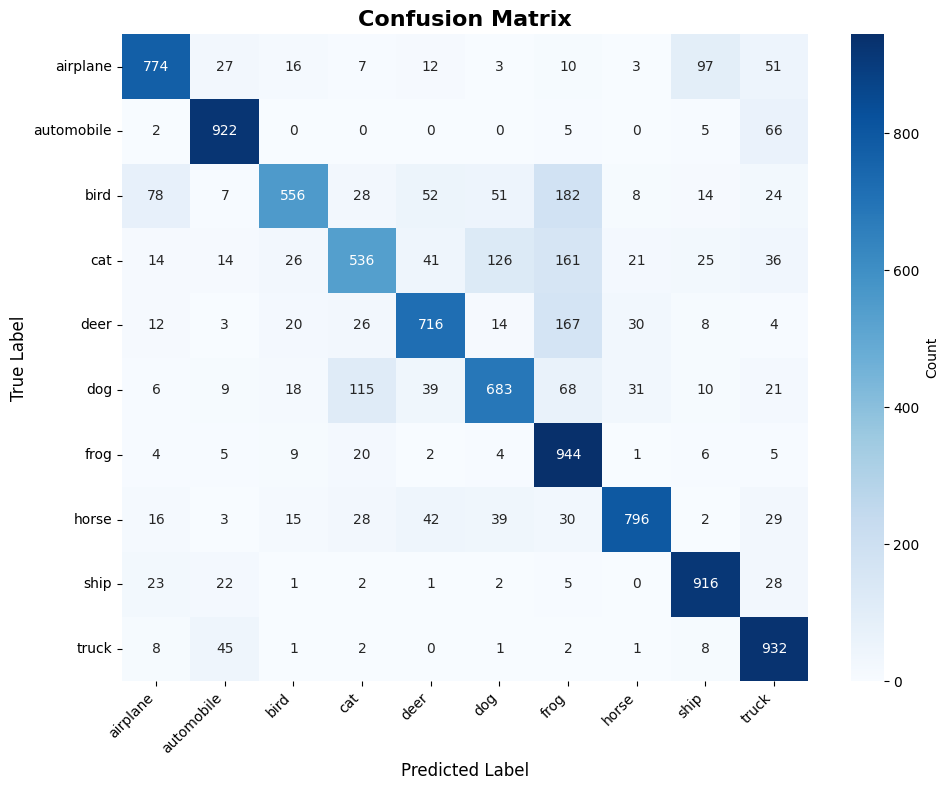

✅ Confusion matrix disimpan sebagai 'confusion_matrix.png'


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Prediksi seluruh test set
print("🔄 Memprediksi seluruh test set...")
all_predictions = model.predict(x_test, verbose=0)
y_pred = np.argmax(all_predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrix disimpan sebagai 'confusion_matrix.png'")

In [ ]:
from sklearn.metrics import classification_report

# Tampilkan classification report
print("\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))
print("="*70)

# Hitung accuracy per class
class_accuracy = cm.diagonal() / cm.sum(axis=1)

print("\n" + "="*70)
print("ACCURACY PER CLASS")
print("="*70)
for i, class_name in enumerate(class_names):
    print(f"{class_name:12s}: {class_accuracy[i]*100:6.2f}%")
print("="*70)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

    airplane     0.8260    0.7740    0.7992      1000
  automobile     0.8723    0.9220    0.8965      1000
        bird     0.8399    0.5560    0.6691      1000
         cat     0.7016    0.5360    0.6077      1000
        deer     0.7912    0.7160    0.7517      1000
         dog     0.7400    0.6830    0.7103      1000
        frog     0.5997    0.9440    0.7335      1000
       horse     0.8934    0.7960    0.8419      1000
        ship     0.8396    0.9160    0.8761      1000
       truck     0.7793    0.9320    0.8488      1000

    accuracy                         0.7775     10000
   macro avg     0.7883    0.7775    0.7735     10000
weighted avg     0.7883    0.7775    0.7735     10000


ACCURACY PER CLASS
airplane    :  77.40%
automobile  :  92.20%
bird        :  55.60%
cat         :  53.60%
deer        :  71.60%
dog         :  68.30%
frog        :  94.40%
horse       :  79.60%
ship        :  91.60%


📊 Total kesalahan prediksi: 2225 dari 10000 (22.25%)


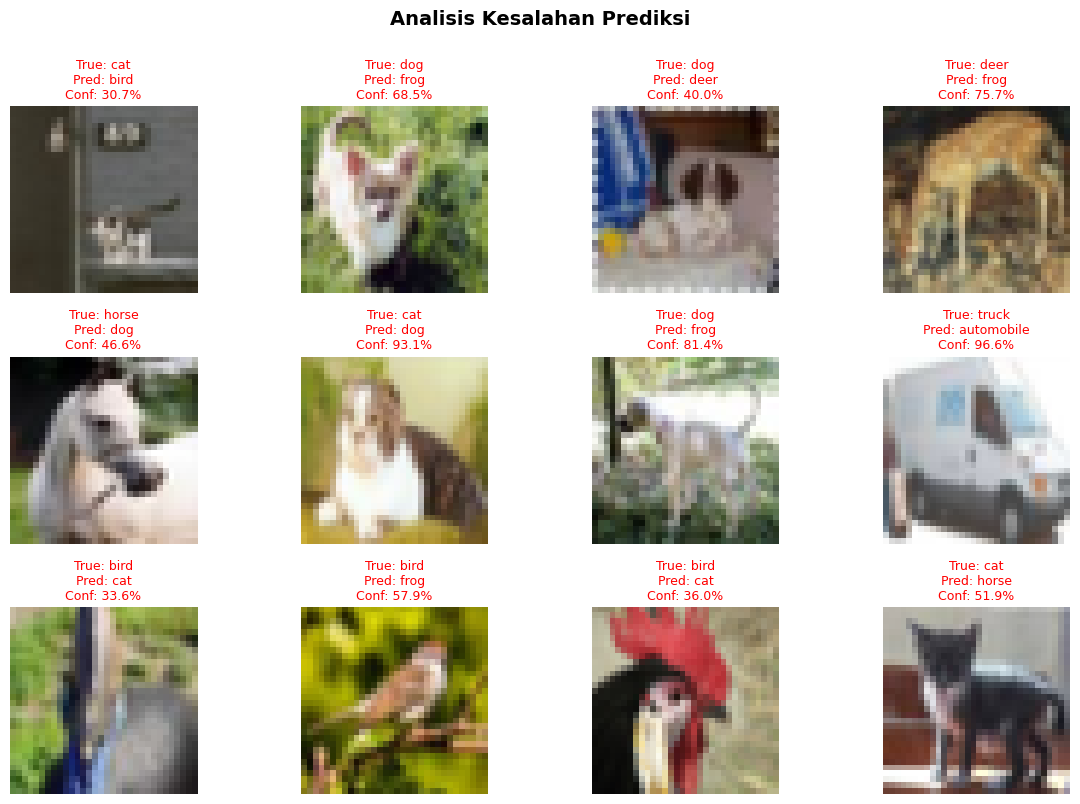

✅ Analisis kesalahan disimpan sebagai 'error_analysis.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cari prediksi yang salah
wrong_indices = np.where(y_pred != y_true)[0]
print(f"📊 Total kesalahan prediksi: {len(wrong_indices)} dari {len(y_test)} ({len(wrong_indices)/len(y_test)*100:.2f}%)")

# Ambil 12 sample kesalahan
num_errors = min(12, len(wrong_indices))
error_samples = np.random.choice(wrong_indices, num_errors, replace=False)

# Visualisasi kesalahan
plt.figure(figsize=(12, 8))
for i, idx in enumerate(error_samples):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[idx])

    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    confidence = all_predictions[idx][y_pred[idx]] * 100

    plt.title(
        f'True: {true_label}\n'
        f'Pred: {pred_label}\n'
        f'Conf: {confidence:.1f}%',
        color='red', fontsize=9
    )
    plt.axis('off')

plt.suptitle('Analisis Kesalahan Prediksi', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('error_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Analisis kesalahan disimpan sebagai 'error_analysis.png'")

In [ ]:
# Simpan model dalam format Keras terbaru (.keras)
model.save('cnn_image_classifier_final.keras')
print("✅ Model berhasil disimpan sebagai 'cnn_image_classifier_final.keras'")

# Simpan juga dalam format HDF5 untuk kompatibilitas
model.save('cnn_image_classifier_final.h5')
print("✅ Model berhasil disimpan sebagai 'cnn_image_classifier_final.h5'")

# Export untuk TensorFlow Serving/TFLite
model.export('saved_model/')
print("✅ Model berhasil di-export ke folder 'saved_model/'")

# Informasi ukuran file
import os

if os.path.exists('best_model.h5'):
    size_best = os.path.getsize('best_model.h5') / (1024*1024)
    print(f"\n📁 best_model.h5: {size_best:.2f} MB")

if os.path.exists('cnn_image_classifier_final.keras'):
    size_keras = os.path.getsize('cnn_image_classifier_final.keras') / (1024*1024)
    print(f"📁 cnn_image_classifier_final.keras: {size_keras:.2f} MB")

if os.path.exists('cnn_image_classifier_final.h5'):
    size_h5 = os.path.getsize('cnn_image_classifier_final.h5') / (1024*1024)
    print(f"📁 cnn_image_classifier_final.h5: {size_h5:.2f} MB")

print("\n✅ Semua format model berhasil disimpan!")

✅ Model berhasil disimpan sebagai 'cnn_image_classifier_final.keras'
✅ Model berhasil disimpan sebagai 'cnn_image_classifier_final.h5'
Saved artifact at 'saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134248603105232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134250877637200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134248405993616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134248405993808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134248603107152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134248603106192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134248405993040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134248405993424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134248405994576: TensorS

🔄 Loading saved model...


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Model berhasil di-load!


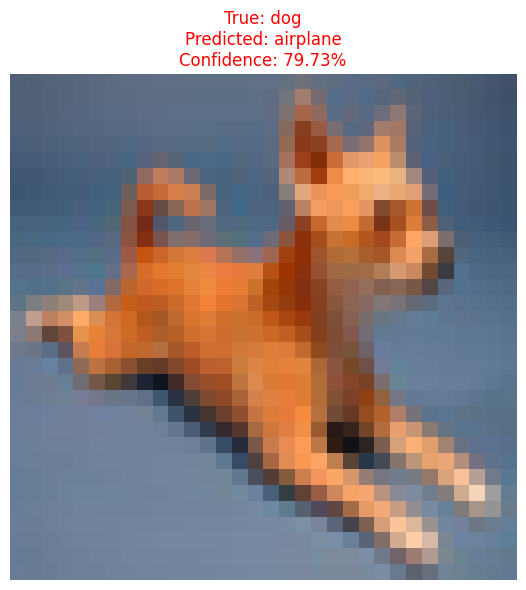


True Label: dog
Predicted Label: airplane
Confidence: 79.73%


In [ ]:
# Load model dalam format Keras terbaru
print("🔄 Loading saved model...")
loaded_model = keras.models.load_model('cnn_image_classifier_final.keras')
print("✅ Model berhasil di-load!")

# Test dengan 1 gambar random
test_idx = np.random.randint(0, len(x_test))
test_image = x_test[test_idx:test_idx+1]
test_label = y_test[test_idx]

# Prediksi
prediction = loaded_model.predict(test_image, verbose=0)
predicted_class = np.argmax(prediction)
true_class = np.argmax(test_label)
confidence = prediction[0][predicted_class] * 100

# Visualisasi
plt.figure(figsize=(6, 6))
plt.imshow(test_image[0])
plt.title(
    f'True: {class_names[true_class]}\n'
    f'Predicted: {class_names[predicted_class]}\n'
    f'Confidence: {confidence:.2f}%',
    fontsize=12,
    color='green' if predicted_class == true_class else 'red'
)
plt.axis('off')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print(f"True Label: {class_names[true_class]}")
print(f"Predicted Label: {class_names[predicted_class]}")
print(f"Confidence: {confidence:.2f}%")
print("="*50)